# Text Classification (part 2)

For this section we are going to look at text classification into two genres, 'news' and 'fiction', based on the Brown corpus.

First we will download the Brown corpus

In [ ]:
import nltk
nltk.download("brown")
from nltk.corpus import brown
from math import log


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


We will now divide our corpus into train and test. Use 500 random documents from each category for test and the remaining documents as training

In [ ]:
from random import shuffle

news = list(brown.sents(categories="news"))
fiction = list(brown.sents(categories="fiction"))

shuffle(news)
shuffle(fiction)

train_news = news[:-500]
train_fiction = fiction[:-500]
test_sents = news[-500:] + fiction[-500:]


Next we will count the corpus and choose as features the words that have are between the 50th most frequent and the 2000th most frequent

In [ ]:
from nltk import FreqDist

words = FreqDist(w.lower() for w in brown.words())

feat_words = set(w[0] for w in words.most_common(2000)) - set(w[0] for w in words.most_common(50))

fd_news = FreqDist(w.lower() for w in brown.words(categories="news") if w in feat_words)
fd_fiction = FreqDist(w.lower() for w in brown.words(categories="fiction") if w in feat_words)

We will now apply Naïve Bayes to make our classifier. First calculate the base probability as $\log(P(news)) - \log(P(fiction))$.

Then classify using the Naïve Bayes formula

$\log(P(news)) + \sum_i \log P(w_i | news) > \log(P(fiction)) + \sum_i \log P(w_i | fiction)$

Use a small value `1e-6` as the frequency for words not in one corpus.


In [ ]:
base_prob = log(len(train_news)/(len(train_news)+len(train_fiction))) - log(len(train_fiction)/(len(train_news)+len(train_fiction)))

log_p_news = log(len(train_news)/(len(train_news)+len(train_fiction)))
log_p_fiction = log(len(train_fiction)/(len(train_news)+len(train_fiction)))

def classify(text, base_prob):
  total = base_prob
  for w in text:
    total += log(fd_news[w] / fd_news.N() + 1e-6)
    total -= log(fd_fiction[w] / fd_fiction.N() + 1e-6)
  if total > 0:
    return "news"
  else:
    return "fiction"


In [ ]:
classify(["this","is","a","test"], base_prob)

'news'

We will now calculate the effectiveness of our classifier using precision, recall and F-Measure

In [ ]:
def evaluate(base_prob):
  tp = 0
  fp = 0
  fn = 0
  tn = 0Copy of 04 
  for sent in test_sents:
    if i < 500:
      if classify(sent, base_prob) == "news":
        tp += 1
      else:
        fn += 1
    else:
      if classify(sent, base_prob) == "news":
        fp += 1
      else:
        tn += 1
    i += 1
  return (tp/(tp+fp), tp/(tp + fn), 2*tp/(2*tp +fp + fn))

precision, recall, fm = evaluate(base_prob)

print("Precision",precision)
print("Recall",recall)
print("F-Measure",fm)

Precision 0.8204633204633205
Recall 0.85
F-Measure 0.8349705304518664


What can we change in order to increase the recall (at the cost of precision) or precision (at the cost of recall)?

Plot the change in precision and recall according to this parameter by varying this parameter over the range `arange(-5,5,0.5)`

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange

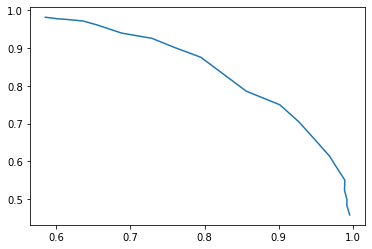

In [ ]:
parameter = arange(-5,5,0.5)

precision = []
recall = []

for base_prob in parameter:
  p,r,fm = evaluate(base_prob)
  precision.append(p)
  recall.append(r)

plt.plot(precision, recall)